In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/glove-6b-100d/glove.6B.100d.txt
/kaggle/input/twitter-sentiment-dataset/train.csv


# Import Necessary Libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import re
import warnings
from nltk.stem import PorterStemmer
warnings.filterwarnings('ignore')

In [2]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Set the NLTK data path manually
nltk.data.path.append('/usr/share/nltk_data')

# Try downloading WordNet again
nltk.download('wordnet')


[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
# List files in the NLTK data directory
# print(nltk.data.find('corpora/wordnet'))

# Load Data and Data Anaysis

In [5]:
df = pd.read_csv("/kaggle/input/twitter-sentiment-dataset/train.csv")

In [6]:
df.columns

Index(['Sentiment', 'text'], dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1036908 entries, 0 to 1036907
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Sentiment  1036908 non-null  int64 
 1   text       1036908 non-null  object
dtypes: int64(1), object(1)
memory usage: 15.8+ MB


In [8]:
df.isna().sum()
# No null vaules

Sentiment    0
text         0
dtype: int64

In [9]:
df.Sentiment.value_counts()
# Data have Sentiment values 0 (Negative) and 4 (Positive)

Sentiment
0    790181
4    246727
Name: count, dtype: int64

In [10]:
# replace he 4 with 1 for Postive Sentiment
df['Sentiment'] = df['Sentiment'].replace({4:1})

* 0 represent Negative sentiment
* 1 represents Positive sentiment

# EDA

### Sentiment Column

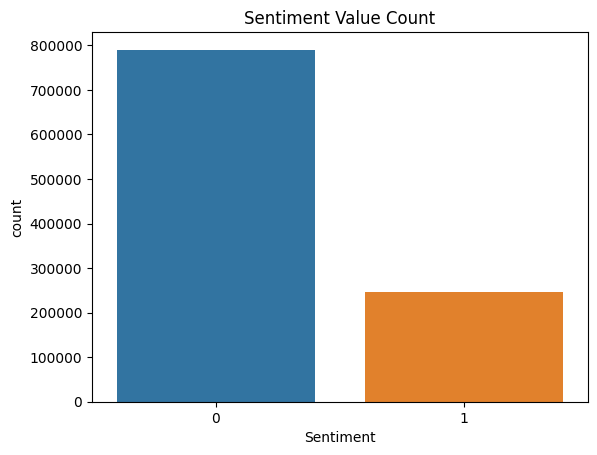

In [11]:
sns.countplot(x=df['Sentiment'])
plt.title("Sentiment Value Count")
plt.show()

> With above visualiation you can see data is imblanced so, we can perform undersampling and oversampling on the data. I will perform data under sampling due to resource constrain but you can try upsampling also.

# Down Sampling

In [12]:
from sklearn.utils import resample
## majority class 0
df_majority = df[df['Sentiment']==0]
## minority class 1
df_minority = df[df['Sentiment']==1][:20000]
df_minority.shape
# downsample the majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,   
                                 n_samples=len(df_minority),    
                                 random_state=1234) 
df = pd.concat([df_majority_downsampled, df_minority])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 40000 entries, 254910 to 810180
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Sentiment  40000 non-null  int64 
 1   text       40000 non-null  object
dtypes: int64(1), object(1)
memory usage: 937.5+ KB


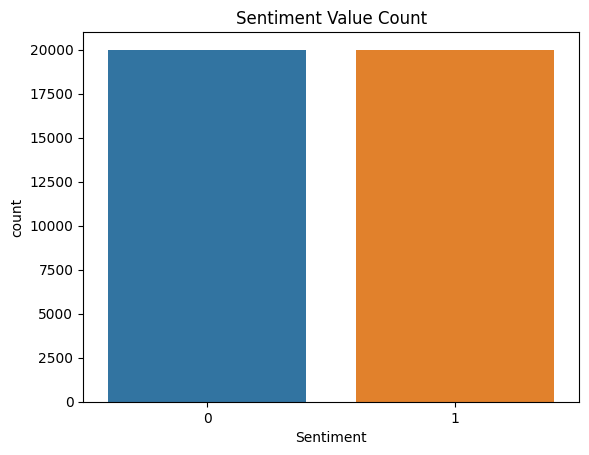

In [13]:
sns.countplot(x=df['Sentiment'])
plt.title("Sentiment Value Count")
plt.show()

### Text Column

> To perform EDA on text field we should perform text preprocessing for better visulization

# Text Preprocessing

1. Lowercasing → Ensures uniformity.
2. Website Removal → Deletes URLs starting with http, https, www.
3. Punctuation Removal → Removes special characters (.,!?).
4. Tokenization → Splits text into words.
5. Stopword Removal → Removes common words like "is", "the", "at".
6. Alphanumeric Code Removal → Removes words with both numbers & letters (e.g., sde32wsd).
7. Number Removal → Removes words that contain only numbers (12345).
8. Stemming → Converts words to base form (running → run, swimming → swim).

In [14]:
## remove stopwords and punctuation marks
word_to_be_removed = list(stopwords.words('english'))+list(punctuation)
# Initilize stemmer
porter = PorterStemmer()

# Function to clean text
def clean_text(text):
    # 1. Convert to lowercase
    text = text.lower()
    # 2. Remove website URLs (http, https, www)
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)    
    # 3. Remove alphanumeric codes (words with both letters & numbers, like 'w223')
    words = re.sub(r'\b[a-zA-Z0-9]*\d+[a-zA-Z0-9]*\b', '', text)
    # 4. Remove numbers-only words using regex
    words = re.sub(r'\b(?<![0-9-])(\d+)(?![0-9-])\b', '', text)    
    # 5. Tokenization
    words = word_tokenize(text)
    # 6. Lemmatization, Remove stop words and punctuation
    words = [porter.stem(word) for word in words if not word in word_to_be_removed and len(word)>2]
    
    return ' '.join(words)

# Apply cleaning function to text column
df['cleaned_text'] = df['text'].apply(clean_text)


In [15]:
df.sample(5)

,Sentiment,text,cleaned_text
798831,1,@gabysslave that's ok.,gabysslav
18047,0,Just doesn't want to have to worry. That's all...,n't want worri want
468961,0,@jordan0rly LOL no it wasn't me but I was tem...,jordan0rli lol n't tempt today actual
802958,1,"@Coley81 Oh, good it there! Thanks",coley81 good thank
55319,0,Not what I expected it to be,expect


In [16]:
# Storing positive data seperately
positive = df[df['Sentiment'] == 1]
positive_list = positive['cleaned_text'].tolist()

# Storing negative data seperately

negative = df[df['Sentiment'] == 0]
negative_list = negative['cleaned_text'].tolist()

In [17]:
positive_all = " ".join([word for word in positive_list])
negative_all = " ".join([word for word in negative_list])

## Positive Words - Word Cloud

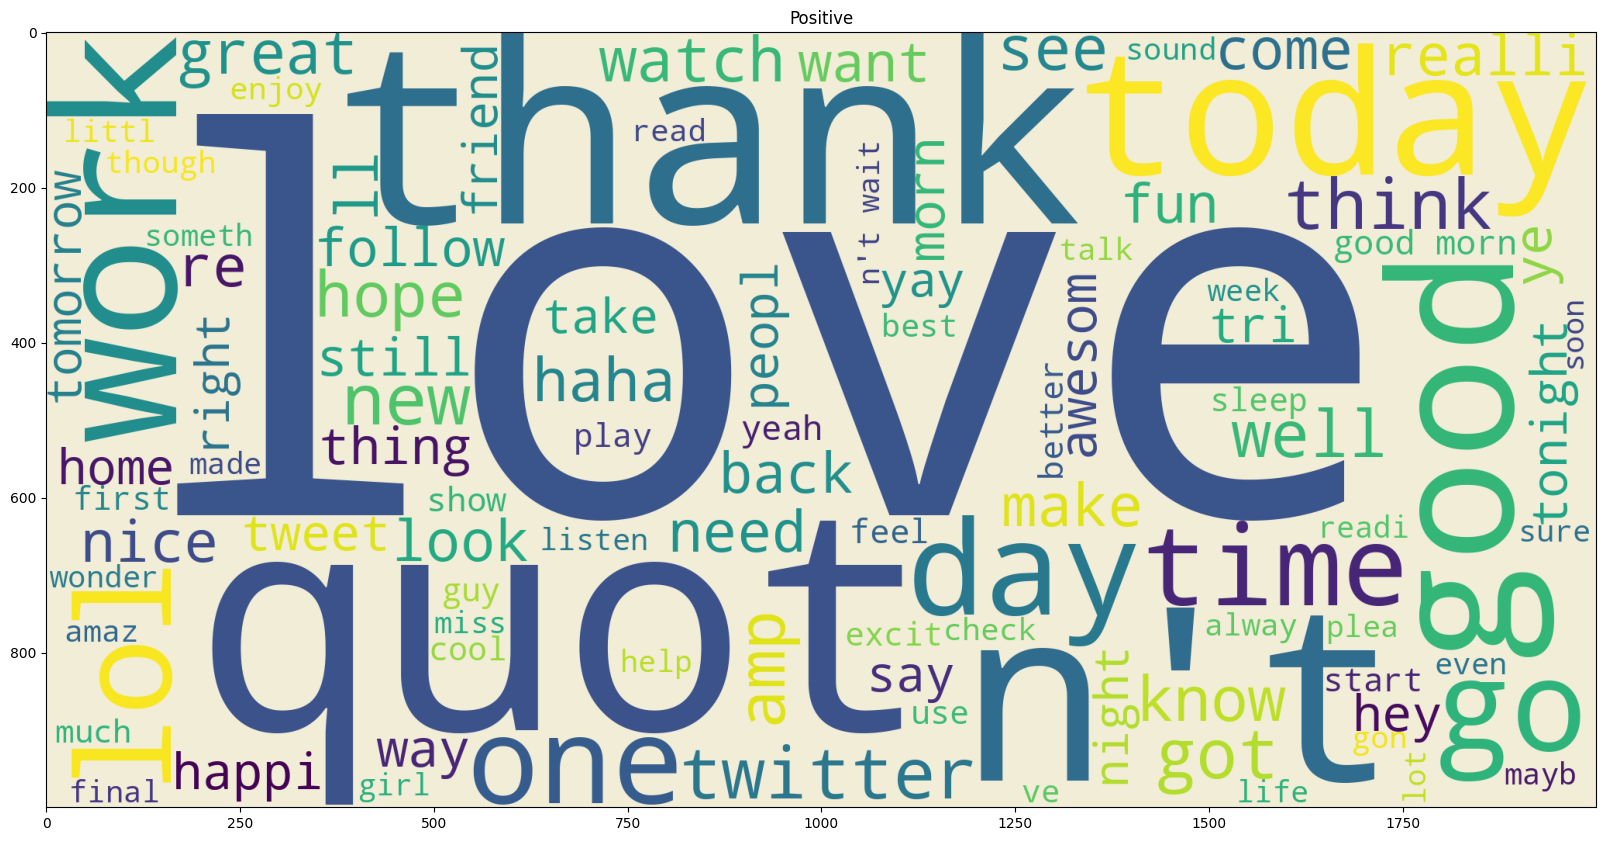

In [18]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(positive_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("Positive")
plt.show()

## Negative Words - Word Cloud

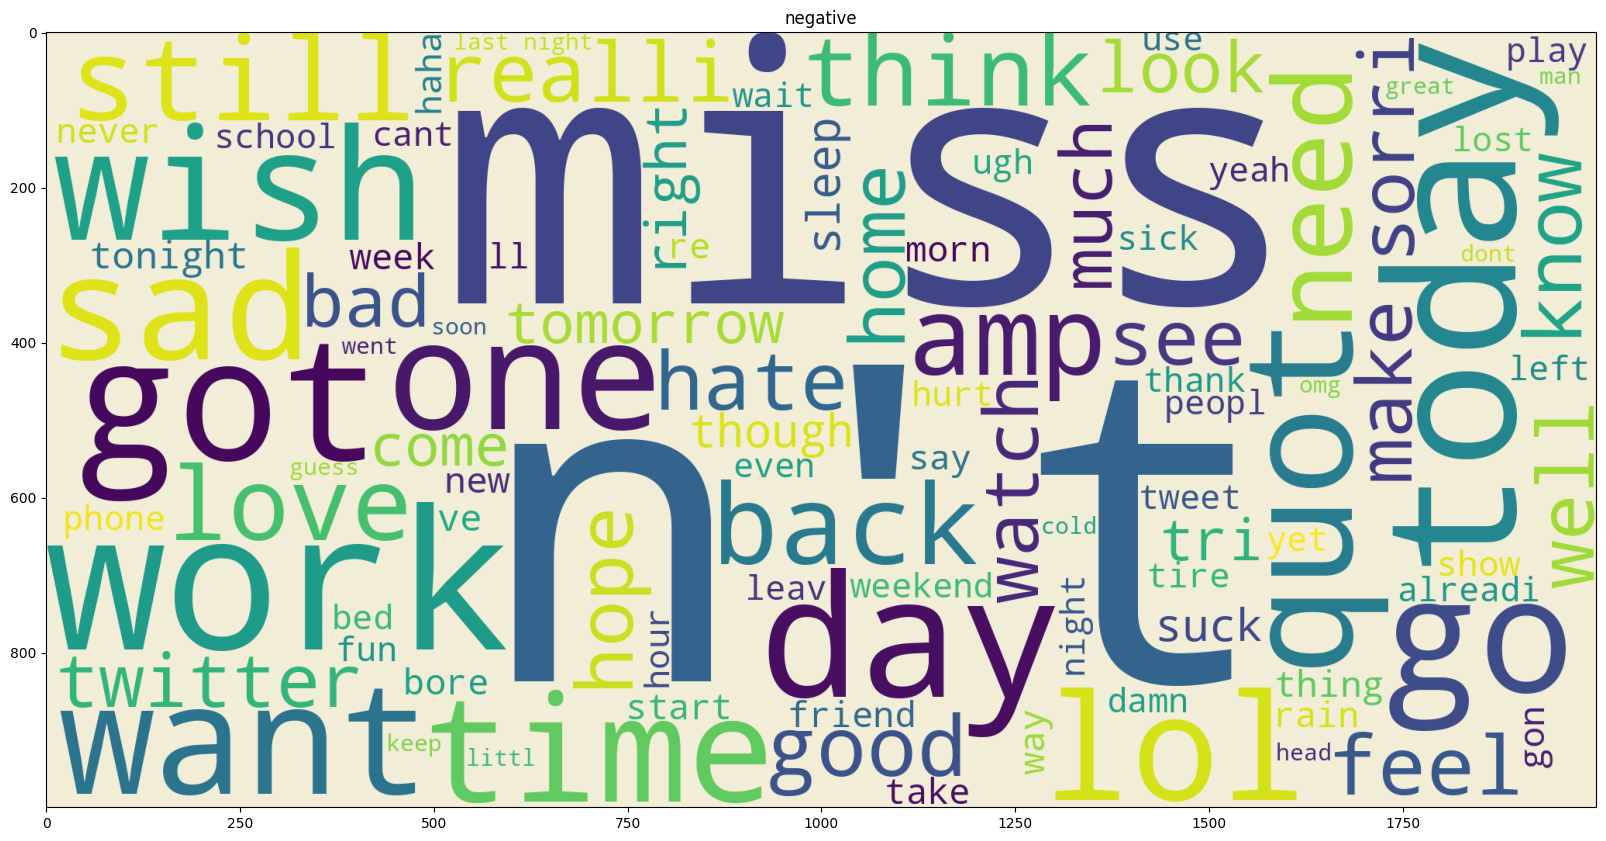

In [19]:
from wordcloud import WordCloud
WordCloud()
wordcloud = WordCloud(width=2000,
                      height=1000,
                      background_color='#F2EDD7FF',
                      max_words = 100).generate(negative_all)

plt.figure(figsize=(20,30))
plt.imshow(wordcloud)
plt.title("negative")
plt.show()

# Test Train Split

In [20]:
# Split dataset into training and testing sets
from sklearn.model_selection import train_test_split
X = df['cleaned_text']
y = df['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using TF-IDF Text Representation Technique

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer= TfidfVectorizer()
tf_x_train = vectorizer.fit_transform(X_train).toarray()
tf_x_test = vectorizer.transform(X_test).toarray()

In [23]:
# from sklearn.decomposition import TruncatedSVD

# # Reduce dimensionality to 1000 features if your dont have enough resources
# svd = TruncatedSVD(n_components=1000)
# tf_x_train_reduced = svd.fit_transform(tf_x_train.reshape(tf_x_train.shape[0], -1))
# tf_x_test_reduced = svd.transform(tf_x_test.reshape(tf_x_test.shape[0], -1))


In [24]:
tf_x_train.shape

(32000, 35236)

In [25]:
import numpy as np

# Reshape TF-IDF vectors to 3D shape (batch_size, 1, input_dim)
tf_x_train_reshape = np.reshape(tf_x_train, (tf_x_train.shape[0], 1, tf_x_train.shape[1]))
tf_x_test_reshape = np.reshape(tf_x_test, (tf_x_test.shape[0], 1, tf_x_test.shape[1]))
tf_x_train_reshape.shape

# Reshape to 3D of reduced training data
# tf_x_train_reshape = np.reshape(tf_x_train_reduced, (tf_x_train_reduced.shape[0], 1, tf_x_train_reduced.shape[1]))
# tf_x_train_reshape = np.reshape(tf_x_test_reduced, (tf_x_test_reduced.shape[0], 1, tf_x_test_reduced.shape[1]))

(32000, 1, 35236)

## RNN Based Model

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [27]:
input_dim = tf_x_train_reshape.shape[2]
# If you're rebuilding the model multiple times in a script, clear the TensorFlow session to avoid conflicts
tf.keras.backend.clear_session()

model = Sequential()

# Input shape: (None, input_dim) where input_dim is the size of the TF-IDF vector
# First RNN layer with more units and return_sequences=True for stacking
model.add(SimpleRNN(128, input_shape=(1, input_dim), return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())  # Normalize the output of the RNN layer
model.add(Dropout(0.6))  # Dropout for regularization

# Second RNN layer
model.add(SimpleRNN(64, return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.6))

# Fully connected dense layer
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.6))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Smaller learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1, 128)              │       4,526,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 128)              │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,544,321 (17.34 MB)

 Trainable params: 4,543,809 (17.33 MB)

 Non-trainable params: 512 (2.00 KB)

In [28]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop after 3 epochs without improvement
    restore_best_weights=True  # Restore the best model weights
    
)

# Assuming you have labels in y_train and y_test
history = model.fit(
    tf_x_train_reshape, y_train,
    epochs=50,  # Adjust the number of epochs
    batch_size=1280,  # Adjust the batch size
    validation_split=0.2, # Split train data into train and val
    callbacks=[early_stopping],  # Add early stopping
    verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 12s 273ms/step - accuracy: 0.4937 - loss: 4.9387 - val_accuracy: 0.5008 - val_loss: 3.9720
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.5215 - loss: 4.1933 - val_accuracy: 0.5008 - val_loss: 3.5594
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 104ms/step - accuracy: 0.5418 - loss: 3.7644 - val_accuracy: 0.5008 - val_loss: 3.3163
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.5736 - loss: 3.4780 - val_accuracy: 0.5008 - val_loss: 3.1571
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.6000 - loss: 3.2692 - val_accuracy: 0.5008 - val_loss: 3.0429
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.6140 - loss: 3.1326 - val_accuracy: 0.5008 - val_loss: 2.9528
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 105ms/step - accuracy: 0.6273 - loss: 3.0170 - val_accuracy: 0.5013 - val_loss: 2.8768
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 107ms/step - accuracy: 0.6506 - loss: 2.8962 - val_accuracy: 0

In [29]:
# history.history

In [30]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(tf_x_test_reshape, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7227 - loss: 1.5712
Test Loss: 1.5438789129257202
Test Accuracy: 0.7263749837875366


## Final Report for RNN Based Model

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|RNN Model|93.91%|72.27%|


## LSTM Based Model

In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [45]:
input_dim = tf_x_train_reshape.shape[2]
# If you're rebuilding the model multiple times in a script, clear the TensorFlow session to avoid conflicts
tf.keras.backend.clear_session()

model = Sequential()

# Input shape: (None, input_dim) where input_dim is the size of the TF-IDF vector
# First RNN layer with more units and return_sequences=True for stacking
model.add(LSTM(256, input_shape=(1, input_dim), return_sequences=True, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())  # Normalize the output of the RNN layer
model.add(Dropout(0.6))  # Dropout for regularization

# Second RNN layer
model.add(LSTM(512, return_sequences=False, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.6))

# Fully connected dense layer
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.6))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Smaller learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 1, 256)              │      36,344,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 512)                 │       1,574,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,955,969 (144.79 MB)

 Trainable params: 37,954,305 (144.78 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [49]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=30,          # Stop after 3 epochs without improvement
    restore_best_weights=True  # Restore the best model weights
    
)

# Assuming you have labels in y_train and y_test
history = model.fit(
    tf_x_train_reshape, y_train,
    epochs=50,  # Adjust the number of epochs
    batch_size=1280,  # Adjust the batch size
    validation_split=0.2, # Split train data into train and val
    callbacks=[early_stopping],  # Add early stopping
    verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 314ms/step - accuracy: 0.7028 - loss: 5.2637 - val_accuracy: 0.7322 - val_loss: 5.1921
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - accuracy: 0.7069 - loss: 5.2142 - val_accuracy: 0.7330 - val_loss: 5.1776
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.7059 - loss: 5.1870 - val_accuracy: 0.7361 - val_loss: 5.1501
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.7052 - loss: 5.1752 - val_accuracy: 0.7408 - val_loss: 5.1335
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 176ms/step - accuracy: 0.7082 - loss: 5.1599 - val_accuracy: 0.7383 - val_loss: 5.1359
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 183ms/step - accuracy: 0.7145 - loss: 5.1577 - val_accuracy: 0.7383 - val_loss: 5.1276
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.7119 - loss: 5.1604 - val_accuracy: 0.7375 - val_loss: 5.1244
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.7059 - loss: 5.1600 - val_accuracy: 0.

In [47]:
# history.history

In [50]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(tf_x_test_reshape, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.7341 - loss: 5.1098
Test Loss: 5.108731746673584
Test Accuracy: 0.734375


## Final Report for LSTM Based Model

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|LSTM Model|75.11%|73.43%|


## GRU Based Model

In [52]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [53]:
input_dim = tf_x_train_reshape.shape[2]
# If you're rebuilding the model multiple times in a script, clear the TensorFlow session to avoid conflicts
tf.keras.backend.clear_session()

model = Sequential()

# Input shape: (None, input_dim) where input_dim is the size of the TF-IDF vector
# First RNN layer with more units and return_sequences=True for stacking
model.add(GRU(256, input_shape=(1, input_dim), return_sequences=True, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())  # Normalize the output of the RNN layer
model.add(Dropout(0.6))  # Dropout for regularization

# Second RNN layer
model.add(GRU(512, return_sequences=False, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.6))

# Fully connected dense layer
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.6))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Smaller learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 1, 256)              │      27,259,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 256)              │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 256)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 512)                 │       1,182,720 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,478,337 (108.64 MB)

 Trainable params: 28,476,673 (108.63 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [54]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=30,          # Stop after 30 epochs without improvement
    restore_best_weights=True  # Restore the best model weights
    
)

# Assuming you have labels in y_train and y_test
history = model.fit(
    tf_x_train_reshape, y_train,
    epochs=50,  # Adjust the number of epochs
    batch_size=1280,  # Adjust the batch size
    validation_split=0.2, # Split train data into train and val
    callbacks=[early_stopping],  # Add early stopping
    verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 301ms/step - accuracy: 0.5059 - loss: 1766.2526 - val_accuracy: 0.4992 - val_loss: 1391.0502
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.5260 - loss: 1281.0555 - val_accuracy: 0.4992 - val_loss: 969.4613
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.5475 - loss: 880.0292 - val_accuracy: 0.4992 - val_loss: 631.0616
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.5786 - loss: 562.3784 - val_accuracy: 0.4992 - val_loss: 376.3850
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.6057 - loss: 328.3600 - val_accuracy: 0.4992 - val_loss: 204.8554
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.6290 - loss: 177.2543 - val_accuracy: 0.4992 - val_loss: 115.3184
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 160ms/step - accuracy: 0.6588 - loss: 107.3690 - val_accuracy: 0.4992 - val_loss: 92.4890
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 164ms/step - accuracy: 0.6672 - 

In [47]:
# history.history

In [55]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(tf_x_test_reshape, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7397 - loss: 4.1365
Test Loss: 4.135278701782227
Test Accuracy: 0.7393749952316284


## Final Report for GRU Based Model

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|GRU Model|76.87%|73.93%|


## Final Report of all DL Models for TFIDF Text Representation 

For TFIDF Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|RNN Model|76.87%|73.93%|
|LSTM Model|75.11%|73.43%|
|GRU Model|76.87%|73.93%|


# Using GloVe Text Representation Technique

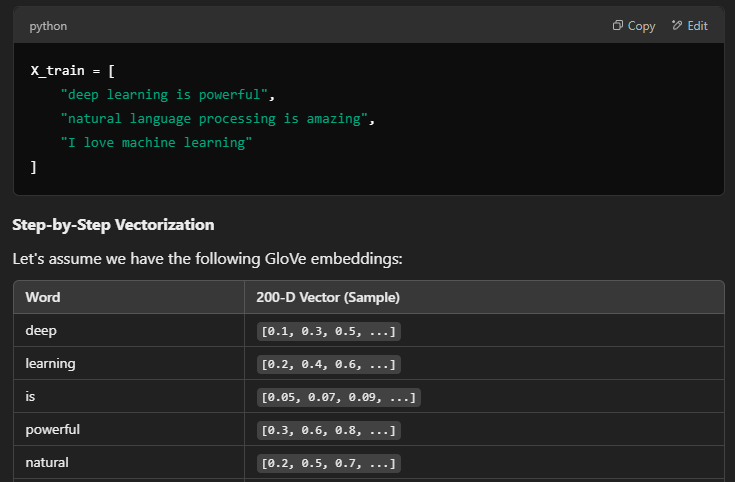
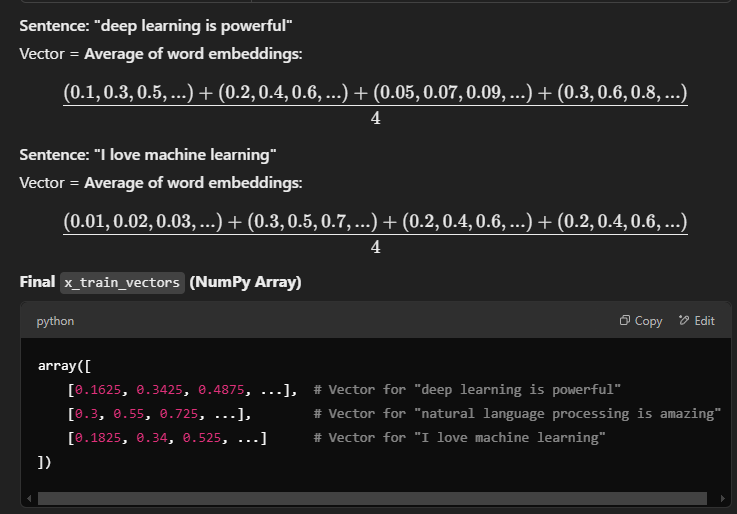

In [22]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("incorpes/glove6b200d")

# print("Path to dataset files:", path)

In [21]:
# Load GloVe embeddings
def load_glove_embeddings(glove_path):
    embeddings_index = {}
    with open(glove_path, encoding="utf8") as f:
        for line in f:
            values = line.split()
            word = values[0]
            vector = np.asarray(values[1:], dtype='float32')
            embeddings_index[word] = vector
    return embeddings_index

# Convert sentences to vectors by averaging word embeddings
def sentence_to_vector(sentence, embeddings_index, embedding_dim=100):
    words = sentence.split()
    valid_embeddings = [embeddings_index[word] for word in words if word in embeddings_index]
    if valid_embeddings:
        return np.mean(valid_embeddings, axis=0)
    else:
        return np.zeros(embedding_dim)

# Load embeddings
glove_path = "/kaggle/input/glove-6b-100d/glove.6B.100d.txt"  # Update with the actual path to the file
embeddings_index = load_glove_embeddings(glove_path)

# Convert text data to vectors
tf_x_train = np.array([sentence_to_vector(text, embeddings_index) for text in X_train])
tf_x_test = np.array([sentence_to_vector(text, embeddings_index) for text in X_test])


In [22]:
tf_x_train.shape

(32000, 100)

In [23]:
import numpy as np

# Reshape TF-IDF vectors to 3D shape (batch_size, 1, input_dim)
tf_x_train_reshape = np.reshape(tf_x_train, (tf_x_train.shape[0], 1, tf_x_train.shape[1]))
tf_x_test_reshape = np.reshape(tf_x_test, (tf_x_test.shape[0], 1, tf_x_test.shape[1]))
tf_x_train_reshape.shape

# Reshape to 3D of reduced training data
# tf_x_train_reshape = np.reshape(tf_x_train_reduced, (tf_x_train_reduced.shape[0], 1, tf_x_train_reduced.shape[1]))
# tf_x_train_reshape = np.reshape(tf_x_test_reduced, (tf_x_test_reduced.shape[0], 1, tf_x_test_reduced.shape[1]))

(32000, 1, 100)

## RNN Based Model

In [39]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [44]:
input_dim = tf_x_train_reshape.shape[2]
# If you're rebuilding the model multiple times in a script, clear the TensorFlow session to avoid conflicts
tf.keras.backend.clear_session()

model = Sequential()

# Input shape: (None, input_dim) where input_dim is the size of the TF-IDF vector
# First RNN layer with more units and return_sequences=True for stacking
model.add(SimpleRNN(1028, input_shape=(1, input_dim), return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())  # Normalize the output of the RNN layer
model.add(Dropout(0.2))  # Dropout for regularization

# Second RNN layer
model.add(SimpleRNN(512, return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fully connected dense layer
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fully connected dense layer
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Smaller learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1, 1028)             │       1,160,612 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 1028)             │           4,112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1028)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 512)                 │         788,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,090,549 (7.97 MB)

 Trainable params: 2,086,189 (7.96 MB)

 Non-trainable params: 4,360 (17.03 KB)

In [45]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop after 3 epochs without improvement
    restore_best_weights=True  # Restore the best model weights
    
)

# Assuming you have labels in y_train and y_test
history = model.fit(
    tf_x_train_reshape, y_train,
    epochs=100,  # Adjust the number of epochs
    batch_size=1280,  # Adjust the batch size
    validation_split=0.2, # Split train data into train and val
    callbacks=[early_stopping],  # Add early stopping
    verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 62ms/step - accuracy: 0.5398 - loss: 13.5342 - val_accuracy: 0.6414 - val_loss: 13.0140
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6109 - loss: 12.9392 - val_accuracy: 0.6320 - val_loss: 12.5191
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6222 - loss: 12.4123 - val_accuracy: 0.6400 - val_loss: 12.0190
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6331 - loss: 11.8985 - val_accuracy: 0.6430 - val_loss: 11.5251
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6424 - loss: 11.3983 - val_accuracy: 0.6498 - val_loss: 11.0446
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6430 - loss: 10.9195 - val_accuracy: 0.6500 - val_loss: 10.5770
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6571 - loss: 10.4544 - val_accuracy: 0.6506 - val_loss: 10.1250
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6606 - loss: 10.0007 - val_accu

In [46]:
# history.history

In [47]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(tf_x_test_reshape, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6865 - loss: 0.8124
Test Loss: 0.8205981254577637
Test Accuracy: 0.6830000281333923


## Final Report for RNN Based Model

For Glove Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|RNN Model|77.55%|68.30%|


## LSTM Based Model

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [27]:
input_dim = tf_x_train_reshape.shape[2]
# If you're rebuilding the model multiple times in a script, clear the TensorFlow session to avoid conflicts
tf.keras.backend.clear_session()

model = Sequential()

# Input shape: (None, input_dim) where input_dim is the size of the TF-IDF vector
# First RNN layer with more units and return_sequences=True for stacking
model.add(Bidirectional(LSTM(2056, return_sequences=True, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)), input_shape=(1, input_dim),))
model.add(BatchNormalization())  # Normalize the output of the RNN layer
model.add(Dropout(0.3))  # Dropout for regularization

# Second RNN layer
model.add(Bidirectional(LSTM(512, return_sequences=False, kernel_regularizer=l1_l2(l1=0.01, l2=0.01))))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected dense layer
model.add(Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
# model.add(Dropout(0.3))

# Fully connected dense layer
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
# model.add(Dropout(0.3))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Smaller learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 1, 4112)             │      35,478,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 4112)             │          16,448 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 4112)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 1024)                │      18,944,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,002,881 (209.82 MB)

 Trainable params: 54,991,457 (209.78 MB)

 Non-trainable params: 11,424 (44.62 KB)

In [28]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=30,          # Stop after 30 epochs without improvement
    restore_best_weights=True  # Restore the best model weights
    
)

# Assuming you have labels in y_train and y_test
history = model.fit(
    tf_x_train_reshape, y_train,
    epochs=100,  # Adjust the number of epochs
    batch_size=1280,  # Adjust the batch size
    validation_split=0.2, # Split train data into train and val
    callbacks=[early_stopping],  # Add early stopping
    verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 8s 168ms/step - accuracy: 0.5345 - loss: 3000.7512 - val_accuracy: 0.4992 - val_loss: 2718.4395
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.5545 - loss: 2629.2168 - val_accuracy: 0.4992 - val_loss: 2366.2568
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.5693 - loss: 2283.3320 - val_accuracy: 0.4992 - val_loss: 2039.5793
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.5815 - loss: 1963.0287 - val_accuracy: 0.4992 - val_loss: 1738.6335
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.6025 - loss: 1668.4576 - val_accuracy: 0.4992 - val_loss: 1463.3278
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.6095 - loss: 1399.4747 - val_accuracy: 0.4992 - val_loss: 1213.4479
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 124ms/step - accuracy: 0.6278 - loss: 1155.8593 - val_accuracy: 0.4992 - val_loss: 988.7712
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - a

In [56]:
# history.history

In [29]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(tf_x_test_reshape, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.6755 - loss: 2.8744
Test Loss: 2.8745663166046143
Test Accuracy: 0.6756250262260437


## Final Report for LSTM Based Model

For GloVe Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|LSTM Model|68.28%|67.56%|


## GRU Based Model

In [30]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [31]:
input_dim = tf_x_train_reshape.shape[2]
# If you're rebuilding the model multiple times in a script, clear the TensorFlow session to avoid conflicts
tf.keras.backend.clear_session()

model = Sequential()

# Input shape: (None, input_dim) where input_dim is the size of the TF-IDF vector
# First RNN layer with more units and return_sequences=True for stacking
model.add(GRU(1024, input_shape=(1, input_dim), return_sequences=True, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())  # Normalize the output of the RNN layer
model.add(Dropout(0.3))  # Dropout for regularization

# Second RNN layer
model.add(GRU(512, return_sequences=False, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected dense layer
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected dense layer
model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Smaller learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 1, 1024)             │       3,459,072 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 1024)             │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 512)                 │       2,362,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,869,633 (22.39 MB)

 Trainable params: 5,866,177 (22.38 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [32]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=30,          # Stop after 30 epochs without improvement
    restore_best_weights=True  # Restore the best model weights
    
)

# Assuming you have labels in y_train and y_test
history = model.fit(
    tf_x_train_reshape, y_train,
    epochs=50,  # Adjust the number of epochs
    batch_size=1280,  # Adjust the batch size
    validation_split=0.2, # Split train data into train and val
    callbacks=[early_stopping],  # Add early stopping
    verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 42ms/step - accuracy: 0.5016 - loss: 478.9816 - val_accuracy: 0.5025 - val_loss: 449.6619
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.5294 - loss: 440.5149 - val_accuracy: 0.5006 - val_loss: 412.5591
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5301 - loss: 403.8286 - val_accuracy: 0.5008 - val_loss: 377.1645
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5447 - loss: 368.8292 - val_accuracy: 0.5008 - val_loss: 343.4982
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5571 - loss: 335.5726 - val_accuracy: 0.5008 - val_loss: 311.5561
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5573 - loss: 304.0438 - val_accuracy: 0.5008 - val_loss: 281.3246
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5725 - loss: 274.2198 - val_accuracy: 0.5008 - val_loss: 252.7967
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5761 - loss: 246.1

In [47]:
# history.history

In [33]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(tf_x_test_reshape, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6705 - loss: 2.7508
Test Loss: 2.7509560585021973
Test Accuracy: 0.671625018119812


## Final Report for GRU Based Model

For GloVe Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|GRU Model|67.64%|67.16%|


## Final Report of all DL Models for TFIDF Text Representation 

For Glove Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|RNN Model|77.55%|68.30%|
|LSTM Model|68.28%|67.56%|
|GRU Model|67.64%|67.16%|


# Using Bert Embeddings Text Representation Technique

In [34]:
from sentence_transformers import SentenceTransformer
import numpy as np

# Load pre-trained BERT model for sentence embeddings
embedding_model = SentenceTransformer('sentence-transformers/bert-base-nli-mean-tokens')  # or 'sentence-transformers/all-MiniLM-L6-v2' for a lighter model


modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.99k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/625 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/399 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [35]:
# Convert to list and ensure string type
X_train = X_train.astype(str).tolist()
X_test = X_test.astype(str).tolist()

# Generate BERT embeddings
tf_x_train = np.array(embedding_model.encode(X_train, convert_to_numpy=True))
tf_x_test = np.array(embedding_model.encode(X_test, convert_to_numpy=True))

Batches:   0%|          | 0/1000 [00:00<?, ?it/s]

Batches:   0%|          | 0/250 [00:00<?, ?it/s]

In [36]:
tf_x_train.shape

(32000, 768)

In [37]:
import numpy as np

# Reshape TF-IDF vectors to 3D shape (batch_size, 1, input_dim)
tf_x_train_reshape = np.reshape(tf_x_train, (tf_x_train.shape[0], 1, tf_x_train.shape[1]))
tf_x_test_reshape = np.reshape(tf_x_test, (tf_x_test.shape[0], 1, tf_x_test.shape[1]))
tf_x_train_reshape.shape

# Reshape to 3D of reduced training data
# tf_x_train_reshape = np.reshape(tf_x_train_reduced, (tf_x_train_reduced.shape[0], 1, tf_x_train_reduced.shape[1]))
# tf_x_train_reshape = np.reshape(tf_x_test_reduced, (tf_x_test_reduced.shape[0], 1, tf_x_test_reduced.shape[1]))

(32000, 1, 768)

## RNN Based Model

In [38]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [39]:
input_dim = tf_x_train_reshape.shape[2]
# If you're rebuilding the model multiple times in a script, clear the TensorFlow session to avoid conflicts
tf.keras.backend.clear_session()

model = Sequential()

# Input shape: (None, input_dim) where input_dim is the size of the TF-IDF vector
# First RNN layer with more units and return_sequences=True for stacking
model.add(SimpleRNN(1028, input_shape=(1, input_dim), return_sequences=True, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())  # Normalize the output of the RNN layer
model.add(Dropout(0.2))  # Dropout for regularization

# Second RNN layer
model.add(SimpleRNN(512, return_sequences=False, kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fully connected dense layer
model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Fully connected dense layer
model.add(Dense(512, activation='relu', kernel_regularizer=l2(0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Smaller learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 1, 1028)             │       1,847,316 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 1028)             │           4,112 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1028)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 512)                 │         788,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 512)                 │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             513 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,777,253 (10.59 MB)

 Trainable params: 2,772,893 (10.58 MB)

 Non-trainable params: 4,360 (17.03 KB)

In [40]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=3,          # Stop after 3 epochs without improvement
    restore_best_weights=True  # Restore the best model weights
    
)

# Assuming you have labels in y_train and y_test
history = model.fit(
    tf_x_train_reshape, y_train,
    epochs=100,  # Adjust the number of epochs
    batch_size=1280,  # Adjust the batch size
    validation_split=0.2, # Split train data into train and val
    callbacks=[early_stopping],  # Add early stopping
    verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.5989 - loss: 20.3335 - val_accuracy: 0.6359 - val_loss: 19.5390
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6537 - loss: 19.3330 - val_accuracy: 0.6806 - val_loss: 18.6099
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6661 - loss: 18.3854 - val_accuracy: 0.6894 - val_loss: 17.6825
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6732 - loss: 17.4623 - val_accuracy: 0.6894 - val_loss: 16.7790
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6815 - loss: 16.5618 - val_accuracy: 0.6889 - val_loss: 15.9082
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6876 - loss: 15.6973 - val_accuracy: 0.6891 - val_loss: 15.0723
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6864 - loss: 14.8717 - val_accuracy: 0.6959 - val_loss: 14.2720
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6926 - loss: 14.0887 - val_ac

In [41]:
# history.history

In [42]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(tf_x_test_reshape, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6926 - loss: 0.9653
Test Loss: 0.9718937277793884
Test Accuracy: 0.6913750171661377


## Final Report for RNN Based Model

For Bert Embeddings Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|RNN Model|86.70%|69.13%|


## LSTM Based Model

In [43]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [44]:
input_dim = tf_x_train_reshape.shape[2]
# If you're rebuilding the model multiple times in a script, clear the TensorFlow session to avoid conflicts
tf.keras.backend.clear_session()

model = Sequential()

# Input shape: (None, input_dim) where input_dim is the size of the TF-IDF vector
# First RNN layer with more units and return_sequences=True for stacking
model.add(Bidirectional(LSTM(2056, return_sequences=True, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)), input_shape=(1, input_dim),))
model.add(BatchNormalization())  # Normalize the output of the RNN layer
model.add(Dropout(0.3))  # Dropout for regularization

# Second RNN layer
model.add(Bidirectional(LSTM(512, return_sequences=False, kernel_regularizer=l1_l2(l1=0.01, l2=0.01))))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected dense layer
model.add(Dense(512, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
# model.add(Dropout(0.3))

# Fully connected dense layer
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
# model.add(Dropout(0.3))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Smaller learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 1, 4112)             │      46,465,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 4112)             │          16,448 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 4112)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 1024)                │      18,944,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 65,990,145 (251.73 MB)

 Trainable params: 65,978,721 (251.69 MB)

 Non-trainable params: 11,424 (44.62 KB)

In [45]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=30,          # Stop after 30 epochs without improvement
    restore_best_weights=True  # Restore the best model weights
    
)

# Assuming you have labels in y_train and y_test
history = model.fit(
    tf_x_train_reshape, y_train,
    epochs=100,  # Adjust the number of epochs
    batch_size=1280,  # Adjust the batch size
    validation_split=0.2, # Split train data into train and val
    callbacks=[early_stopping],  # Add early stopping
    verbose=1)

Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 190ms/step - accuracy: 0.4834 - loss: 4380.3418 - val_accuracy: 0.5008 - val_loss: 3937.8950
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.5387 - loss: 3798.5610 - val_accuracy: 0.5008 - val_loss: 3388.8101
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 144ms/step - accuracy: 0.5517 - loss: 3260.1145 - val_accuracy: 0.5008 - val_loss: 2882.7544
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.5804 - loss: 2764.7839 - val_accuracy: 0.5008 - val_loss: 2420.1057
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - accuracy: 0.6045 - loss: 2312.8728 - val_accuracy: 0.5008 - val_loss: 2000.7471
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.6286 - loss: 1904.1575 - val_accuracy: 0.5008 - val_loss: 1624.2823
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step - accuracy: 0.6463 - loss: 1538.2700 - val_accuracy: 0.5008 - val_loss: 1290.4027
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - 

In [56]:
# history.history

In [46]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(tf_x_test_reshape, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.7251 - loss: 4.0642
Test Loss: 4.0658416748046875
Test Accuracy: 0.7223749756813049


## Final Report for LSTM Based Model

For Bert Embeddings Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|LSTM Model|73.28%|72.24%|


## GRU Based Model

In [47]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.regularizers import l2
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [48]:
input_dim = tf_x_train_reshape.shape[2]
# If you're rebuilding the model multiple times in a script, clear the TensorFlow session to avoid conflicts
tf.keras.backend.clear_session()

model = Sequential()

# Input shape: (None, input_dim) where input_dim is the size of the TF-IDF vector
# First RNN layer with more units and return_sequences=True for stacking
model.add(GRU(1024, input_shape=(1, input_dim), return_sequences=True, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())  # Normalize the output of the RNN layer
model.add(Dropout(0.3))  # Dropout for regularization

# Second RNN layer
model.add(GRU(512, return_sequences=False, kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected dense layer
model.add(Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Fully connected dense layer
model.add(Dense(128, activation='relu', kernel_regularizer=l1_l2(l1=0.01, l2=0.01)))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer for binary classification
model.add(Dense(1, activation='sigmoid'))

# Compile the model
optimizer = Adam(learning_rate=0.0001)  # Smaller learning rate
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 1, 1024)             │       5,511,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1, 1024)             │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1, 1024)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 512)                 │       2,362,368 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,921,729 (30.22 MB)

 Trainable params: 7,918,273 (30.21 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [49]:
# Early stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Monitor validation loss
    patience=30,          # Stop after 30 epochs without improvement
    restore_best_weights=True  # Restore the best model weights
    
)

# Assuming you have labels in y_train and y_test
history = model.fit(
    tf_x_train_reshape, y_train,
    epochs=50,  # Adjust the number of epochs
    batch_size=1280,  # Adjust the batch size
    validation_split=0.2, # Split train data into train and val
    callbacks=[early_stopping],  # Add early stopping
    verbose=1)

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5044 - loss: 877.9474 - val_accuracy: 0.5056 - val_loss: 817.8693
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5400 - loss: 798.8741 - val_accuracy: 0.4992 - val_loss: 741.8378
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5419 - loss: 723.7975 - val_accuracy: 0.4992 - val_loss: 669.7562
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.5630 - loss: 652.6669 - val_accuracy: 0.4992 - val_loss: 601.6570
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5682 - loss: 585.5428 - val_accuracy: 0.4992 - val_loss: 537.5411
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5859 - loss: 522.3834 - val_accuracy: 0.4992 - val_loss: 477.3605
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5917 - loss: 463.1533 - val_accuracy: 0.4992 - val_loss: 421.0845
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.6002 - loss: 407.8

In [50]:
# history.history

In [51]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(tf_x_test_reshape, y_test, verbose=1)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7196 - loss: 2.9474
Test Loss: 2.9479804039001465
Test Accuracy: 0.7162500023841858


## Final Report for GRU Based Model

For Bert Embeddings Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|GRU Model|72.61%|71.62%|


## Final Report of all DL Models for TFIDF Text Representation 

For Bert Embeddings Text Representation Accuracy scores are:

|Model|Training Accuracy|Testing Accuracy|
|---|---|---|
|RNN Model|86.70%|69.13%|
|LSTM Model|73.28%|72.24%|
|GRU Model|72.61%|71.62%|
